The value of K :  6


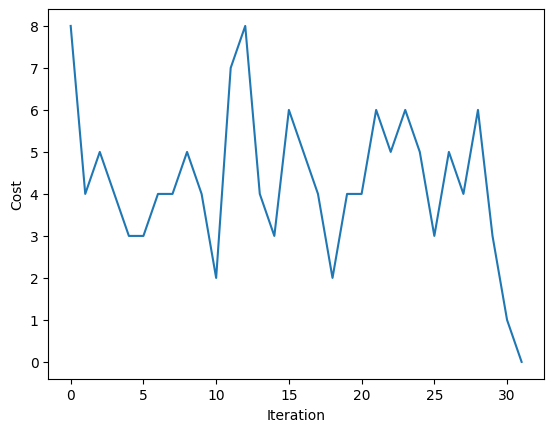

Covering Arrays Found :  [[0, 1, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 1, 1], [1, 1, 0, 1, 0, 1]]
Number of Iterations : 31


In [2]:
import random
import math
import copy
import matplotlib.pyplot as plt


# This function generates and initial random state based on a given value of K
def generate_initial_state(k):
    return [[random.randint(0,1) for i in range(k)] for j in range(6)]

# This function returns the frozen factor
def get_frozen_factor(k):
    return 4*math.comb(k,2)

# The neighbourhood function which generates the next states of the given current state
def generate_next_states(current_state,k):
    j = random.randint(0,k-1)

    new_state1 = copy.deepcopy(current_state)
    new_state1[0][j] = 1 - new_state1[0][j]

    new_state2 = copy.deepcopy(current_state)
    new_state2[1][j] = 1 - new_state2[1][j]

    new_state3 = copy.deepcopy(current_state)
    new_state3[2][j] = 1 - new_state3[2][j]

    new_state4 = copy.deepcopy(current_state)
    new_state4[3][j] = 1 - new_state4[3][j]

    return [new_state1, new_state2, new_state3, new_state4]

# This is a helper function used by Objective function to find missing combinations
def compute_missing_combinations(current_state,col1,col2):
    
    combs = {
    "00" : False,
    "01" : False,
    "10" : False,
    "11" : False
    }

    for row in range(len(current_state)):
        combs[str(current_state[row][col1]) + str(current_state[row][col2])] = True
    
    matches = 0
    for comb in combs:
        if combs[comb]:
            matches = matches +1
    
    return len(combs) - matches

# This is the Objective function computes the cost of a given state
def compute_cost(current_state,k):

    cost = 0
    for i in range(k-1):
        for j in range(i+1,k):
            cost = cost + compute_missing_combinations(current_state,i,j)
    
    return cost


def find_best_state(current_best , current_state,k):

    current_best_cost = compute_cost(current_best,k)
    current_state_cost= compute_cost(current_state,k)
    
    if current_state_cost < current_best_cost:
        return current_state
    else:
        return current_best

# Find the convering arrays based on some initial state and value for K (number of parameters)
def find_covering_array(inital_state,k):

    current_T = k
    final_T = 0.01
    iterations = 0
    frozen_factor = get_frozen_factor(k)
    current_frozen_factor = frozen_factor
    alpha  = 0.99
    best_state = inital_state
    current_state = inital_state
    costs = []


    while current_T >= final_T:

        current_state_cost = compute_cost(current_state,k)

        costs.append(current_state_cost)

        if current_state_cost == 0:
            return True, best_state , iterations , False , False , costs
        
        if current_frozen_factor == 0:
            return False, best_state , iterations , True , False , costs

        iterations = iterations + 1

        next_states = generate_next_states(current_state,k)
        next_state_costs = []

        for i in range(len(next_states)):
            next_state_costs.append(compute_cost(next_states[i],k))

        next_state_min_cost = min(next_state_costs)

        # If the overall cost is improved. Update the cost and best state
        if next_state_min_cost < compute_cost(best_state,k):
            current_frozen_factor = frozen_factor
            for i in range(len(next_state_costs)):
                if next_state_costs[i] == next_state_min_cost:
                    current_state = next_states[i]
                    break
        else :
            # If not then check if the next neighbour improves the current cost, take that neighbour.
            current_frozen_factor = current_frozen_factor - 1
            if next_state_min_cost < compute_cost(current_state,k):
                for i in range(len(next_state_costs)):
                    if next_state_costs[i] == next_state_min_cost:
                        current_state = next_states[i]
                        break 
            else:

                # Else we take a probability function whose value is high in begining but goes down slowly as T comes down.
                for i in range(len(next_state_costs)):
                    cost_difference = abs(next_state_costs[i] - current_state_cost)
                    if random.uniform(0, 1) < math.exp(-cost_difference / current_T):
                        current_state = next_states[i]
                        break
        
        current_T = alpha*current_T
        best_state = find_best_state(best_state,current_state,k)
    
    return False , best_state , iterations , False , True, costs


# The functions which computes covering arrays based on given value of K with number of given executions
def covering_array(k,executions):

    print("The value of K : ", k)

    for i in range(executions):
        inital_state = generate_initial_state(k)
        
        found , solution, iterations , frozen , finalTemp , costs = find_covering_array(inital_state,k)

        plt.plot(costs)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()

        if(found):
            print("Covering Arrays Found : ",solution)
            print("Number of Iterations :",iterations)
        else:
            if frozen:
                print("Covering array not found. Algorithm was frozen")
                print("Approximate of Global Optima", compute_cost(solution,k))
                print("Number of iterations:",iterations)
            else:
                print("Covering array not found. Final temperature was acheived")
                print("Approximate of Global Optima", compute_cost(solution,k))
                print("Number of iterations: ", iterations)


# Running Covering Arrays with k = 5 for 30 executions
covering_array(6,1)
# Running Covering Arrays with k = 6 for 30 executions 
# covering_array(6,30)
# Running Covering Arrays with k = 7 for 30 executions
# covering_array(7,30)